In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl

from boutdata.restart import addvar
import glob
import shutil

sys.path.append(r"/users/mjk557/scratch/scripts/sdtools")

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2

In [2]:
db = CaseDB(
    case_dir = r"/ssd_scratch/hcases",
    grid_dir = r"/ssd_scratch/hcases"
    )

In [3]:


# choice = "b4b-40eV_1e17_fixndiff"
# choice = "b5b-40eV_1e18_fixndiff"
# choice = "b6b-40eV_1e19_fixndiff"
# choice = "c1a-40eV_1e17_newbout"
# choice = "c1b-40eV_1e17_precon"
# choice = "c2a-precon"
# choice = "c3a_4.625e5_nobarrier"
# choice = "x-a1-hidens-test"
# choice = "x-a3-puff2"
choice = "x-a4-heatpuff"
# choice = "c1c-40eV_1e17_lofloor"
# choice = "c2ac-copy"
# choice = "c2ad-copy"
# choice = "b3a-t3-small_temp_steps"

case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a4-lores.nc"],
                    double_load = True)

--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.607E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.032E+00 [m3]


# Post-processing

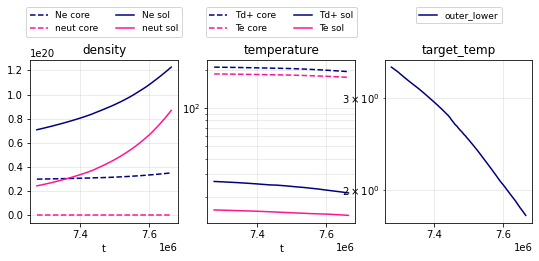

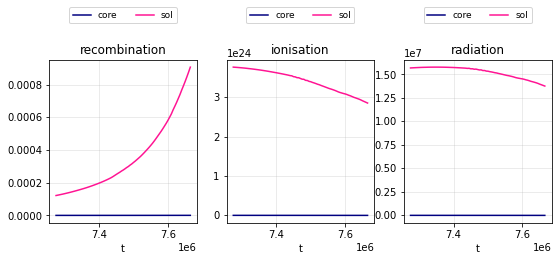

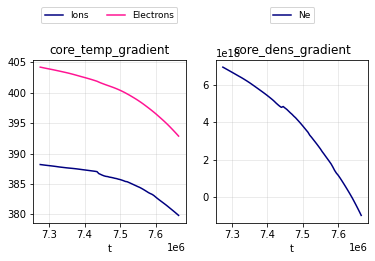

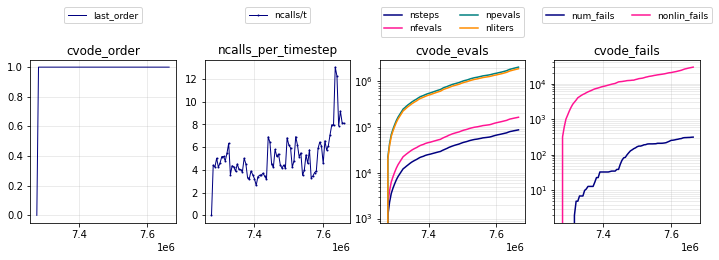

In [4]:
Monitor(case, [["density", "temperature","target_temp"],
               ["recombination", "ionisation", "radiation"],
               ["core_temp_gradient", "core_dens_gradient"],
               ["cvode_order", "ncalls_per_timestep", "cvode_evals", "cvode_fails"]], 
                settings = {"all":{"dpi":150}})
# Monitor(case, [["recombination", "ionisation", "radiation"]])

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': 'lower_divertor', 'dpi': 100}


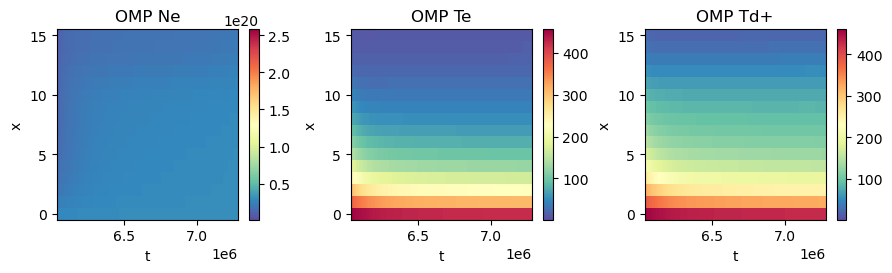

In [5]:
self = Monitor2D(caseng, mode = "omp_history", windows = [["Ne", "Te", "Td+"]], 
                 settings = {
                    "all":{"view":"lower_divertor", "dpi": 100},
                    "Ne":{"vmax":None},
                    "Te":{"vmin":None, "vmax":None},
                    "Td+":{"vmin":None, "vmax":None},
                    })

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': 'None', 'dpi': 150}


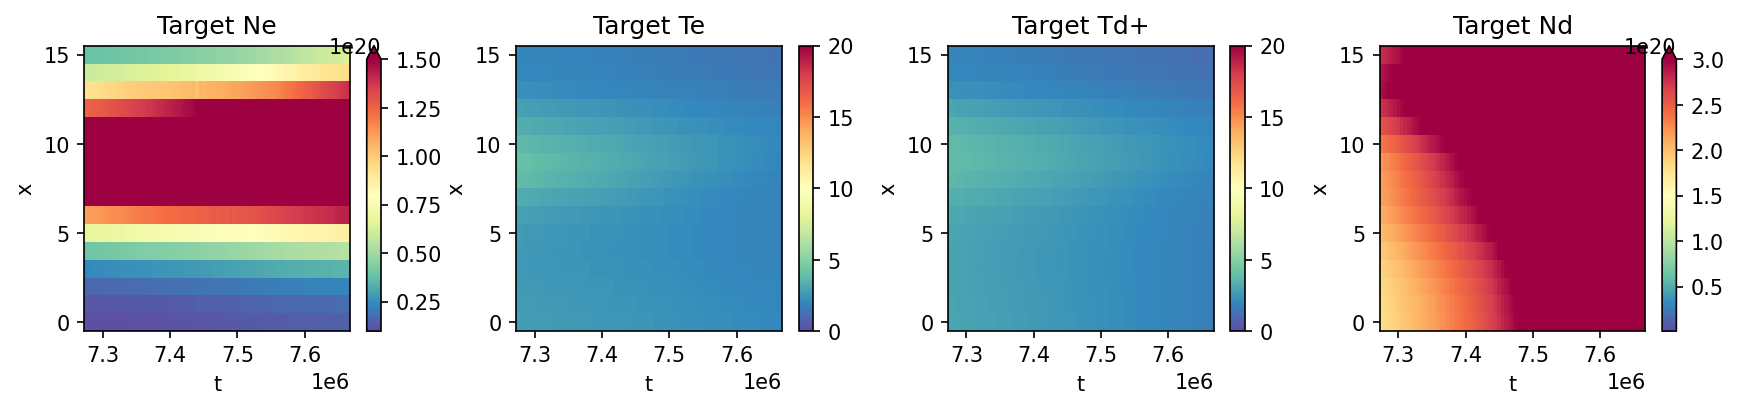

In [5]:
self = Monitor2D(caseng, mode = "target_history", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                    "all":{"view":"None", "dpi": 150},
                    "Ne":{"vmax":15e19},
                    "Te":{"vmin":0, "vmax":20},
                    "Td+":{"vmin":0, "vmax":20},
                    "Nd":{"vmin":1e18, "vmax":3e20}
                    })

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 100}


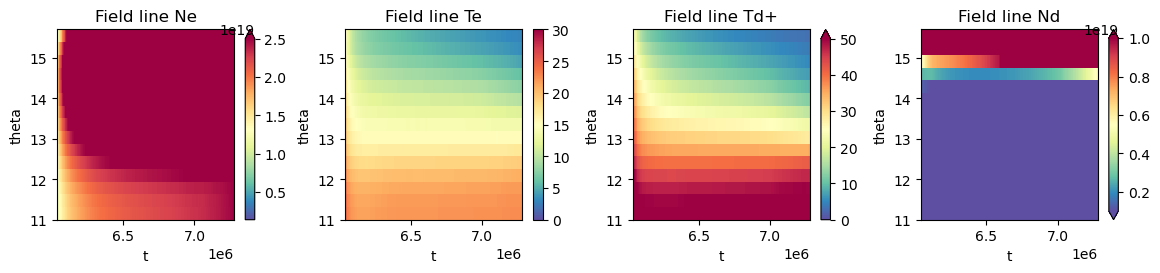

In [7]:
self = Monitor2D(caseng, mode = "field_line_history", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                  #   "all":{"view":"lower_divertor", "dpi": 100},
                    "Ne":{"vmax":2.5e19},
                    "Te":{"vmin":0, "vmax":30},
                    "Td+":{"vmin":0, "vmax":50},
                    "Nd":{"vmin":1e18, "vmax":1e19}
                    })

In [11]:
caseng.unnormalise(unnormalise_geom=False)

--> dx, dy and J will not be unnormalised


{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 100}


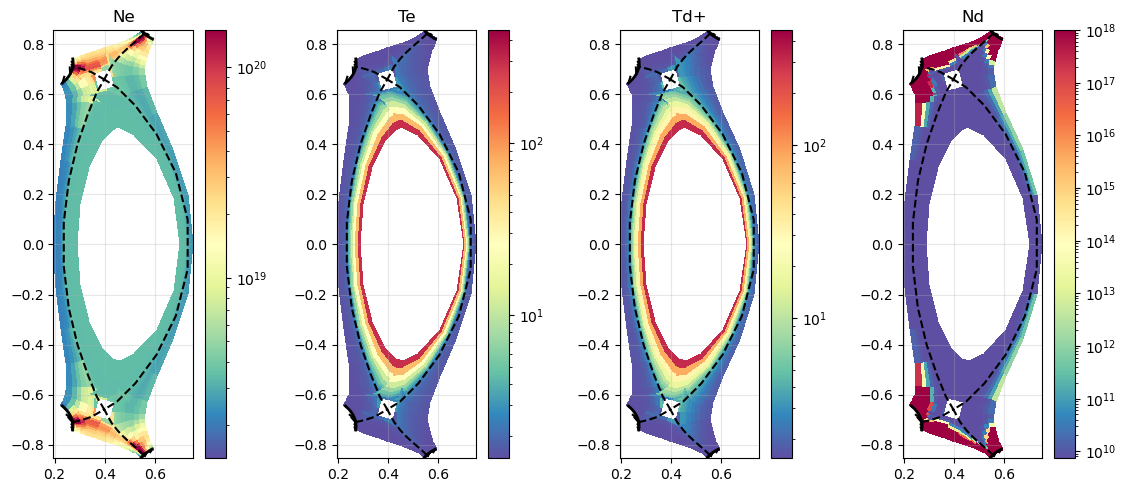

In [16]:
self = Monitor2D(caseng, mode = "pcolor", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                    "all":{"view":None, "dpi": 100},
                    "Sd_src":{"log":False},
                    "Ne":{"vmin":None, "vmax":15e19},
                    "Te":{"log":True, "vmin":None, "vmax":None},
                    "Td+":{"log":True, "vmin":None, "vmax":None},
                    "Nd":{"log":True, "vmin":None, "vmax":1e18}
                    })

# Sources

In [ ]:
(caseng.ds["dv"] * caseng.ds["Sd_src"]).isel(t=-1).values.sum()

7.2e+21

In [ ]:
(caseng.ds["dv"] * caseng.ds["Pd_src"]).isel(t=-1).values.sum()

0.05999999947571325

In [ ]:
caseng.ds["Pd_src"].isel(t=-1).values.sum()

8.999484703409852

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 150}


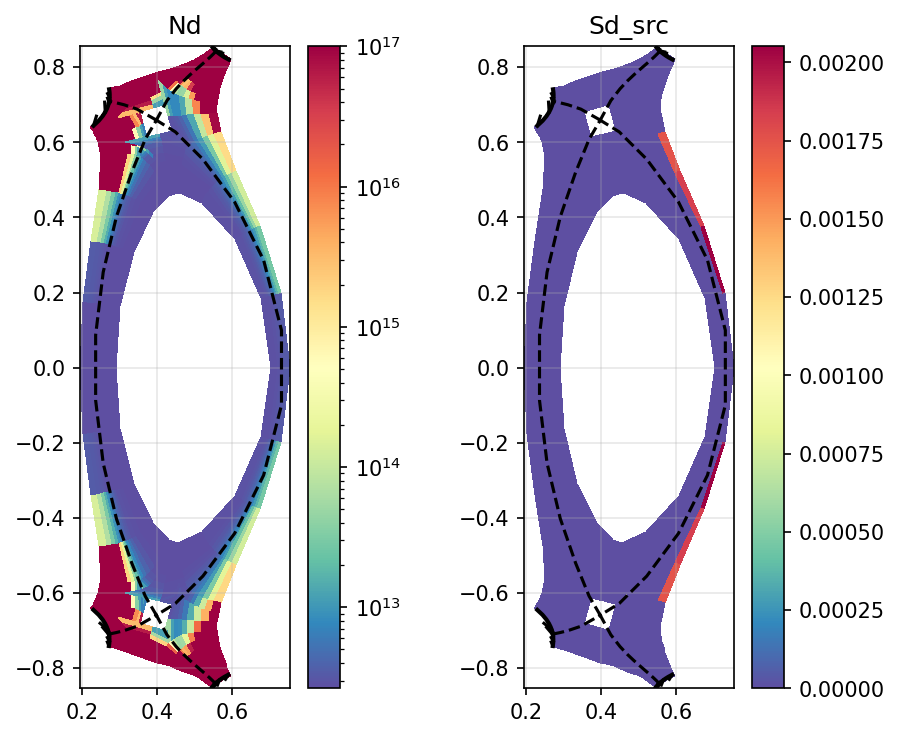

In [24]:
self = Monitor2D(caseng, mode = "pcolor", windows = [["Nd", "Sd_src"]], 
                 settings = {
                    "all":{"view":None, "dpi": 150},
                    "Sd_src":{"log":False},
                    # "Ne":{"vmin":None, "vmax":None},
                    # "Te":{"log":True, "vmin":None, "vmax":None},
                    # "Td+":{"log":True, "vmin":None, "vmax":None},
                    "Nd":{"log":True, "vmin":None, "vmax":1e17}
                    })

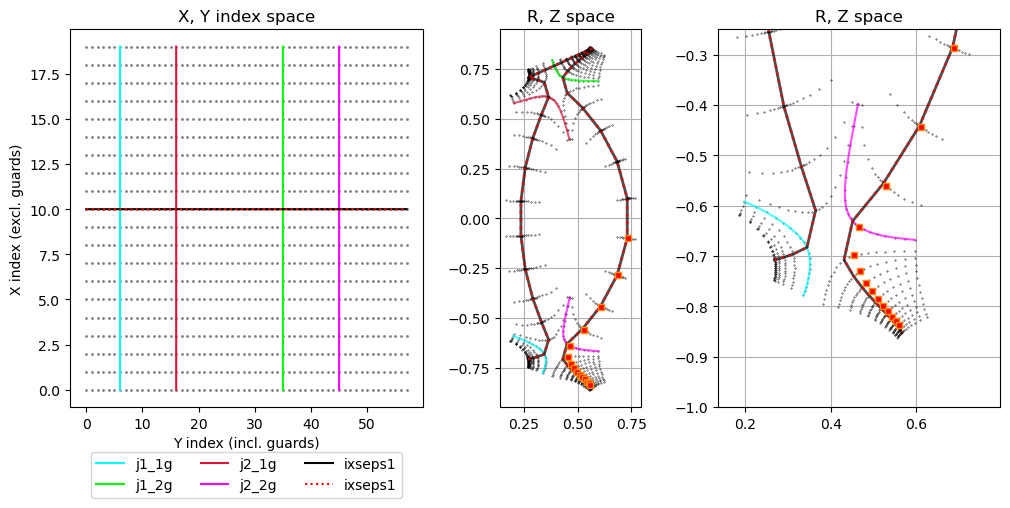

In [8]:
plot_selection(case, case.select_custom_sol_ring(2, "outer_lower"))

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 100}


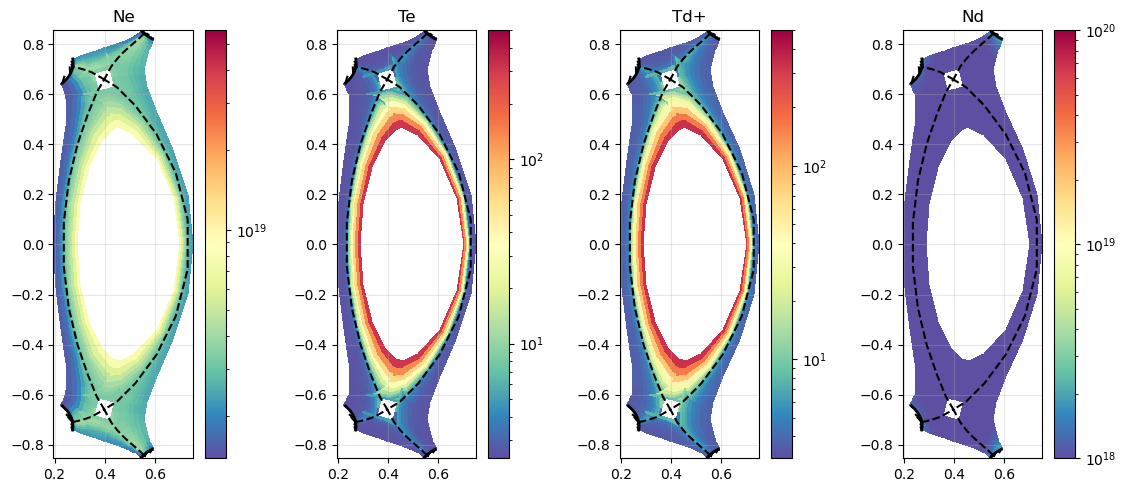

In [12]:
self = Monitor2D(caseng, mode = "pcolor", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                    "all":{"view":None, "dpi": 100},
                    "Ne":{"vmin":None, "vmax":None},
                    "Te":{"log":True, "vmin":None, "vmax":None},
                    "Td+":{"log":True, "vmin":None, "vmax":None},
                    "Nd":{"vmin":1e18, "vmax":1e20}})

# Puff implementation

In [27]:
try:
    mesh.close()
    del mesh
except:
    pass

total_flow = 1.2e21 * 0.1 # atoms per second

# Get volume of region and calculate source
volume = case.select_symmetric_puff(width=3, center_half_gap=1)["dv"]
source = total_flow / volume

# Create new grid from an existing one, read it in and create the Field object
shutil.copy(r"/ssd_scratch/hcases/g3a4-lores.nc", r"/ssd_scratch/hcases/g3a4x1-puff1.nc")
mesh = Mesh(r"/ssd_scratch/hcases/g3a4x1-puff1.nc")
puff = Field("Nd_src", mesh)

# Set puff cells to the calculated source
# Selector slice references puff location
selector = mesh.slices("symmetric_puff")(width=3, center_half_gap=1)
puff.data[selector] = source.values

puff = Field("Nd_src", mesh)
puff.data[selector] = source.values
mesh.write_field(puff)
mesh.close()
del mesh

# Plot to check values
# puff.plot()

# mesh.write_field(puff)

Defining dimension z of size 1
>>> Field Nd_src already exists in /ssd_scratch/hcases/g3a4x1-puff1.nc, it will be overwritten
-> Wrote field Nd_src to /ssd_scratch/hcases/g3a4x1-puff1.nc
Mesh file /ssd_scratch/hcases/g3a4x1-puff1.nc closed


# Heat puff

In [17]:
try:
    mesh.close()
    del mesh
except:
    pass

# Create new grid from an existing one, read it in and create the Field object
shutil.copy(r"/ssd_scratch/hcases/g3a4x1-puff2.nc", r"/ssd_scratch/hcases/g3a4x2-heatpuff.nc")
mesh = Mesh(r"/ssd_scratch/hcases/g3a4x2-heatpuff.nc")
heat_puff = Field("Pd_src", mesh)

puff_region = mesh.slices("symmetric_puff")(width=3, center_half_gap=1)
mesh.mesh["dv"] = mesh.mesh["dy"] * mesh.mesh["dx"] * mesh.mesh["J"] * 2*np.pi
volume = mesh.mesh["dv"][puff_region]
heat_source = 0.01 / volume # 0.1MW
heat_puff.data[puff_region] = heat_source
mesh.write_field(heat_puff)


Mesh file /ssd_scratch/hcases/g3a4x2-heatpuff.nc closed
>>> Field Pd_src already exists in /ssd_scratch/hcases/g3a4x2-heatpuff.nc, it will be overwritten
-> Wrote field Pd_src to /ssd_scratch/hcases/g3a4x2-heatpuff.nc


In [4]:
try:
    mesh.close()
    del mesh
except:
    pass

mesh = Mesh(r"/ssd_scratch/hcases/g3a4x2-heatpuff.nc")


In [11]:
pd_sum_per_volume = mesh.mesh["Pd_src"].sum()
sd_sum_per_volume = mesh.mesh["Nd_src"].sum()

dv = mesh.mesh["dy"] * mesh.mesh["dx"] * mesh.mesh["J"] * 2*np.pi

pd_sum = pd_sum_per_volume * dv
sd_sum = sd_sum_per_volume * dv

print(f"Pressure source per volume: {pd_sum_per_volume:.2e} [Pa s-1 m-3]")
print(f"Total pressure source: {pd_sum:.2e} [Pa s-1]")

print(f"Pressure source per volume: {pd_sum_per_volume:.2e} [Pa s-1 m-3]")
print(f"Total pressure source: {pd_sum:.2e} [Pa s-1]")

Pressure source per volume: 9.00e+00 [Pas-1m-3]
Total pressure source: 9.00e+00 [Pa s-1]


In [7]:
mesh.mesh.keys()


['nx',
 'ny',
 'y_boundary_guards',
 'curvature_type',
 'Bt_axis',
 'psi_axis',
 'psi_bdry',
 'psi_axis_gfile',
 'psi_bdry_gfile',
 'Rxy',
 'Rxy_xlow',
 'Rxy_ylow',
 'Zxy',
 'Zxy_xlow',
 'Zxy_ylow',
 'psixy',
 'psixy_xlow',
 'psixy_ylow',
 'dx',
 'dx_xlow',
 'dx_ylow',
 'dy',
 'dy_xlow',
 'dy_ylow',
 'poloidal_distance',
 'poloidal_distance_xlow',
 'poloidal_distance_ylow',
 'Brxy',
 'Brxy_xlow',
 'Brxy_ylow',
 'Bzxy',
 'Bzxy_xlow',
 'Bzxy_ylow',
 'Bpxy',
 'Bpxy_xlow',
 'Bpxy_ylow',
 'Btxy',
 'Btxy_xlow',
 'Btxy_ylow',
 'Bxy',
 'Bxy_xlow',
 'Bxy_ylow',
 'hy',
 'hy_xlow',
 'hy_ylow',
 'dphidy',
 'dphidy_xlow',
 'dphidy_ylow',
 'ShiftTorsion',
 'ShiftTorsion_xlow',
 'ShiftTorsion_ylow',
 'zShift',
 'zShift_xlow',
 'zShift_ylow',
 'g11',
 'g11_xlow',
 'g11_ylow',
 'g22',
 'g22_xlow',
 'g22_ylow',
 'g33',
 'g33_xlow',
 'g33_ylow',
 'g12',
 'g12_xlow',
 'g12_ylow',
 'g13',
 'g13_xlow',
 'g13_ylow',
 'g23',
 'g23_xlow',
 'g23_ylow',
 'J',
 'J_xlow',
 'J_ylow',
 'g_11',
 'g_11_xlow',
 'g_11_y

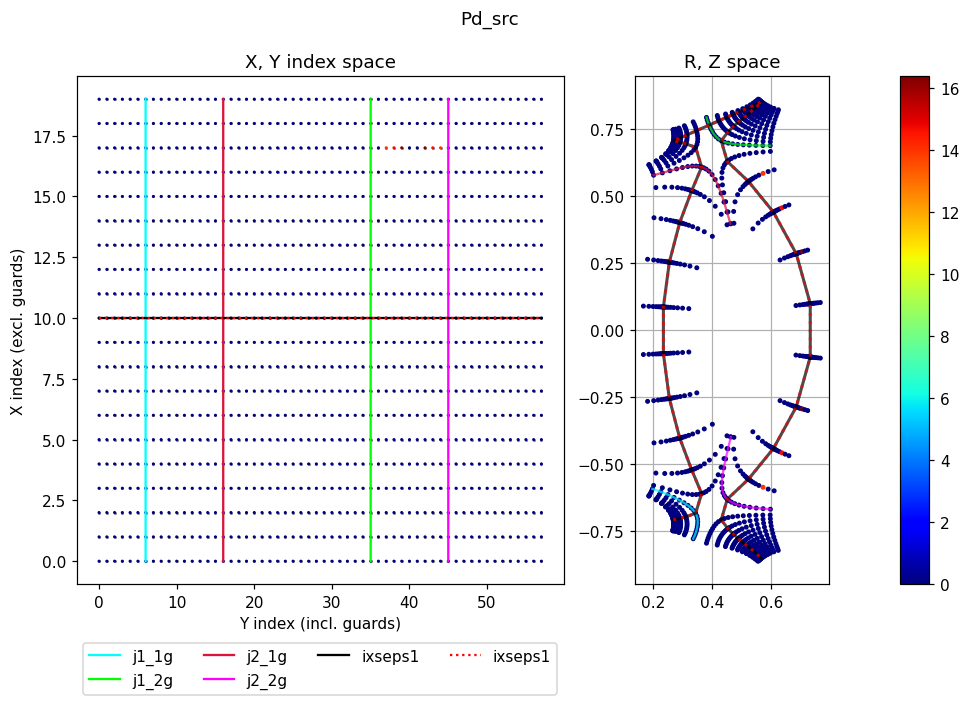

In [14]:
heat_puff.plot()

In [ ]:
try:
    mesh.close()
    del mesh
except:
    pass



# Get volume of region and calculate source
mesh = Mesh(r"/ssd_scratch/hcases/g3a4x1-puff1.nc")
puff = Field("Nd_src", mesh)
puff_region = mesh.slices("symmetric_puff")(width=3, center_half_gap=1)
puff.data[puff_region] = source
mesh.write_field(puff)

total_flow = 1.2e21 * 0.1 # atoms per second
volume = puff_region["dv"]
source = total_flow / volume

puff.data[puff_region] = source.values
mesh.write_field(puff)
mesh.close()

# Create new grid from an existing one, read it in and create the Field object
shutil.copy(r"/ssd_scratch/hcases/g3a4-lores.nc", r"/ssd_scratch/hcases/g3a4x1-puff1.nc")
mesh = Mesh(r"/ssd_scratch/hcases/g3a4x1-puff1.nc")
puff = Field("Nd_src", mesh)

# Set puff cells to the calculated source
# Selector slice references puff location
selector = mesh.slices("symmetric_puff")(width=3, center_half_gap=1)
puff.data[selector] = source.values

mesh.write_field(puff)
mesh.close()
del mesh

# Plot to check values
# puff.plot()

# mesh.write_field(puff)

Defining dimension z of size 1
>>> Field Nd_src already exists in /ssd_scratch/hcases/g3a4x1-puff1.nc, it will be overwritten
-> Wrote field Nd_src to /ssd_scratch/hcases/g3a4x1-puff1.nc
Mesh file /ssd_scratch/hcases/g3a4x1-puff1.nc closed


In [ ]:
mesh = Mesh(r"/ssd_scratch/hcases/g3a4x1-puff1.nc")
# mesh.keys()

In [7]:
mesh.mesh["Nd_src"].squeeze()

BoutArray([[9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
            9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
           [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
            9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
           [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
            9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
           ...,
           [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
            9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
           [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
            9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
           [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
            9.96920997e+36, 9.96920997e+36, 9.96920997e+36]])

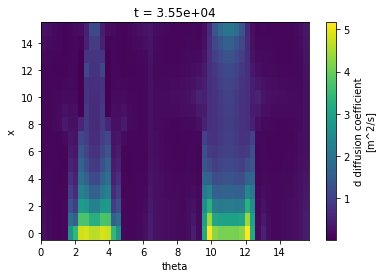

In [13]:
caseng.ds.Dnnd.isel(t=-1).plot()

{'xlim': (None, None), 'ylim': (None, 0), 'figure_aspect': 0.5, 'wspace_modifier': 1, 'view': 'lower_divertor', 'dpi': 100}
(None, 0)


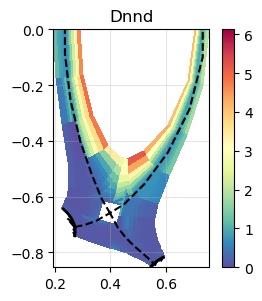

In [ ]:
self = Monitor2D(caseng, mode = "pcolor", windows = [["Dnnd"]], 
                 settings = {
                    "all":{"view":"lower_divertor", "dpi": 100},
                    "Dnnd":{"log":False, "vmax":None}})

Text(0, 0.5, 'Ncalls / time')

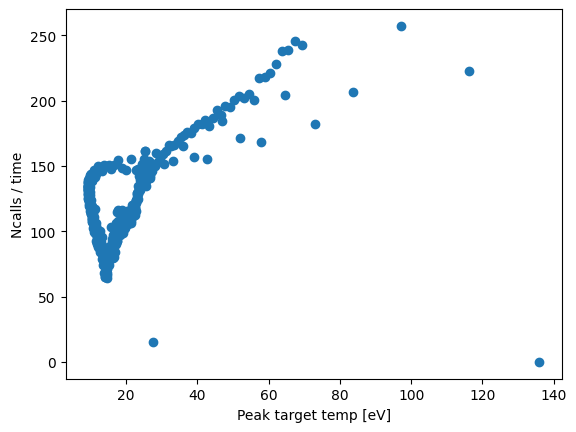

In [8]:
fig, ax = plt.subplots()

ax.scatter(target_temp[0:-1], ncalls_per_t)
ax.set_xlabel("Peak target temp [eV]")
ax.set_ylabel("Ncalls / time")

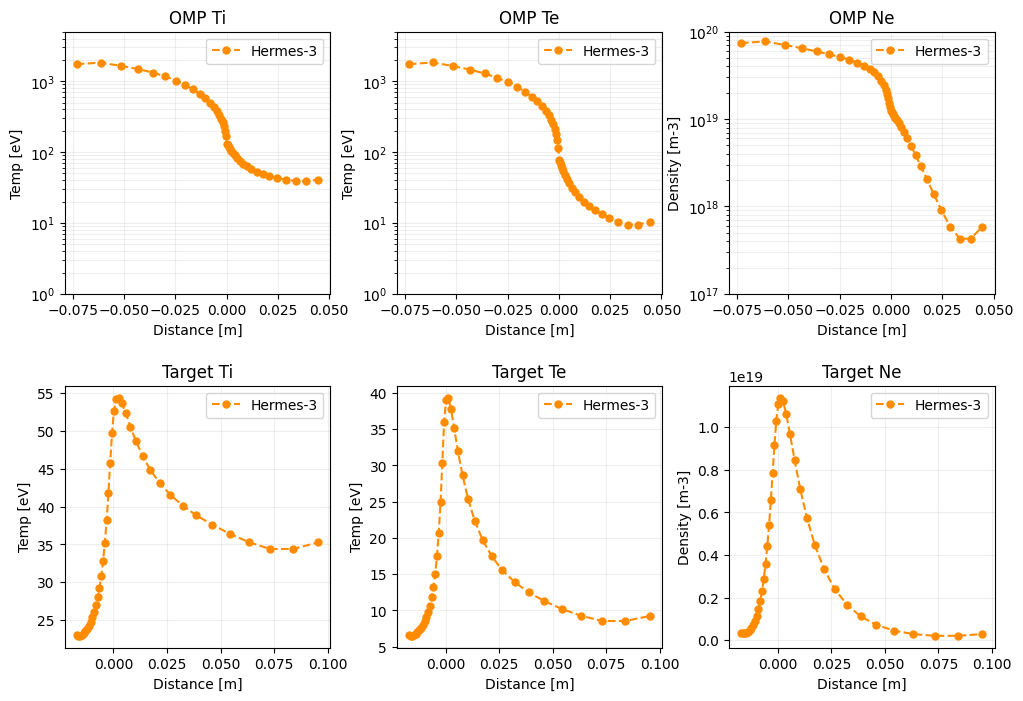

In [7]:
target = Target(case, "outer_lower")
omp = case.select_region("outer_midplane_a").isel(t=-1)

xsep = 0.736

offset_t = -0.018

cols=3; rows=2
fig, axes = plt.subplots(rows,cols, dpi = 100, figsize = (4*cols,4*rows))
fig.subplots_adjust(hspace = 0.35, wspace = 0.25)
colors = ["teal", "darkorange", "firebrick",  "limegreen", "magenta","cyan", "navy"]

marker = "o"
ms = 5

ax = axes[0,0]; ax.set_title("OMP Ti"); ax.set_ylabel("Temp [eV]")
# param = "ti3da"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(omp["R"]-xsep, omp["Td+"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.set_yscale("log"); ax.set_ylim(1, 5000)

ax = axes[0,1]; ax.set_title("OMP Te"); ax.set_ylabel("Temp [eV]")
# param = "te3da"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(omp["R"]-xsep, omp["Te"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.set_yscale("log"); ax.set_ylim(1, 5000)

ax = axes[0,2]; ax.set_title("OMP Ne"); ax.set_ylabel("Density [m-3]")
# param = "ne3da"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(omp["R"]-xsep, omp["Ne"], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.set_yscale("log"); ax.set_ylim(1e17, 1e20)

ax = axes[1,0]; ax.set_title("Target Ti"); ax.set_ylabel("Temp [eV]")
# param = "ti3dr"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(target.r + offset_t, target.temperature[-1,:], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.legend()

ax = axes[1,1]; ax.set_title("Target Te"); ax.set_ylabel("Temp [eV]")
# param = "te3dr"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(target.r + offset_t, target.electron_temperature[-1,:], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)
ax.legend()

ax = axes[1,2]; ax.set_title("Target Ne"); ax.set_ylabel("Density [m-3]")
# param = "ne3dr"; ax.plot(solps_prf[param][0], solps_prf[param][1], c = colors[0], label = "SOLPS", marker = marker, markersize = ms)
ax.plot(target.r + offset_t, target.density[-1,:], c = colors[1], ls = "--", label = "Hermes-3", marker = marker, markersize = ms)

for i in range(rows):
    for j in range(cols):
        axes[i,j].grid(which="both", alpha = 0.2)
        axes[i,j].set_xlabel("Distance [m]")
        axes[i,j].legend()
    

/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])
/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])
/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])


--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.942E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.556E+00 [m3]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}


ValueError: 'linthresh' must be positive

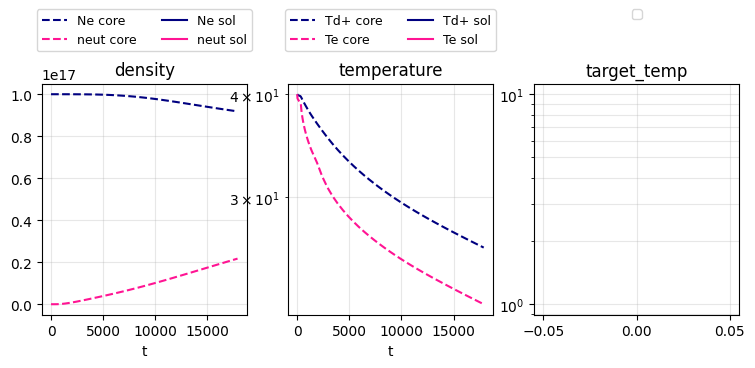

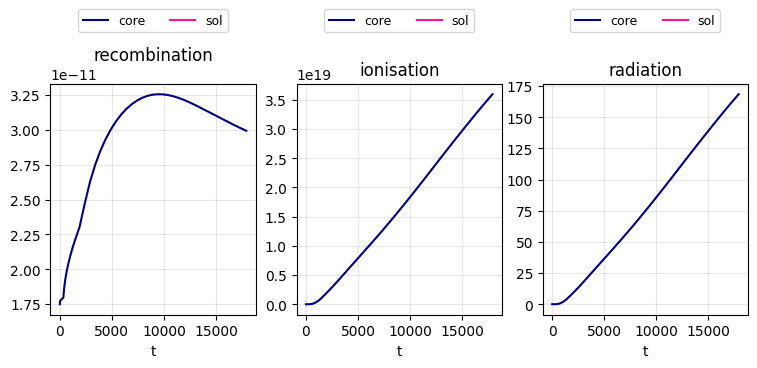

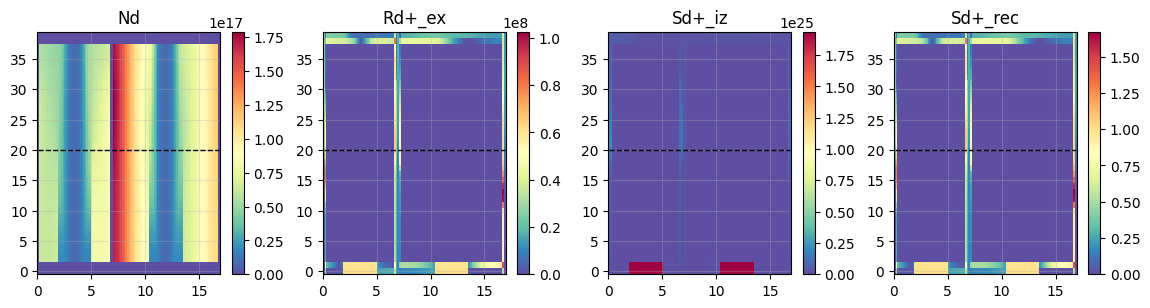

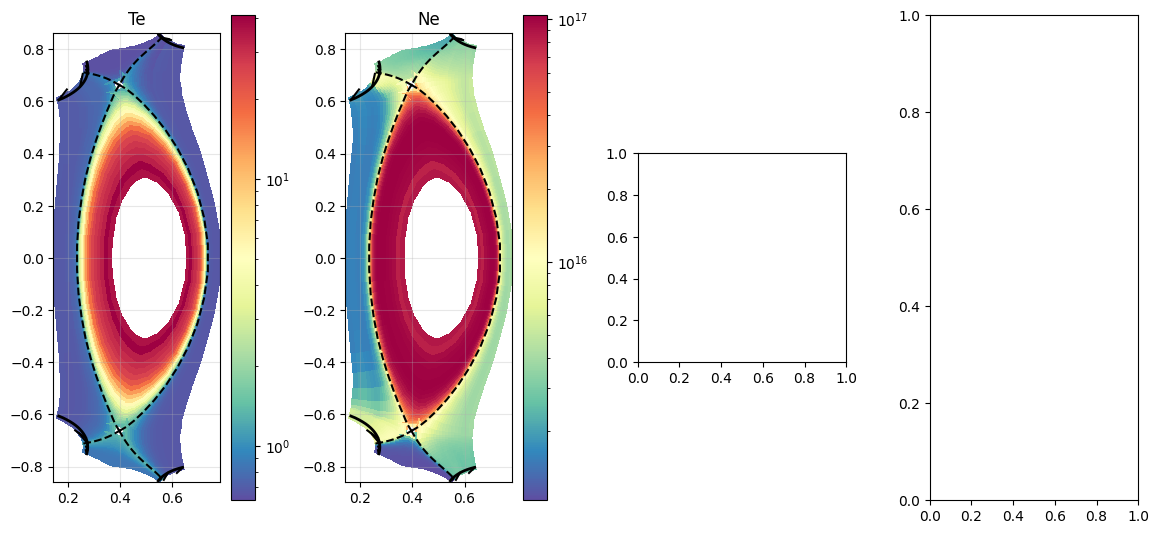

In [13]:
db = CaseDB(
    case_dir = r"/users/mjk557/scratch/cases/st40",
    grid_dir = r"/users/mjk557/scratch/cases"
    )

for choice in ["b4b-40eV_1e17_fixndiff", "b5b-40eV_1e18_fixndiff"]:

    case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a5-fatter.nc"],
                        double_load = True)

    Monitor(caseng, [["density", "temperature","target_temp"]])
    Monitor(caseng, [["recombination", "ionisation", "radiation"]])
    Monitor2D(case, "grid", [["Nd", "Rd+_ex", "Sd+_iz", "Sd+_rec"]])
    Monitor2D(case, "pcolor", [["Te", "Ne", "Nd", "Sd+_iz"]])

In [ ]:
pkl_path = r"/users/mjk557/scratch/last10s.pkl"

def read_from_pickle(path):
    with open(path, 'rb') as file:
        try:
            while True:
                return pkl.load(file)
        except EOFError:
            pass
        
x = read_from_pickle(pkl_path)

In [ ]:
import grid_fields
meshwrapper = grid_fields.Mesh(r"/users/mjk557/scratch/cases/st40/b2b-allsource_newmaster_scratch/g3a3f3-allflux_proper.nc")

m = meshwrapper.mesh

for param in ["Pd+_src", "Pe_src", "Nd+_src"]:
    print(f'\n-> {param}:')
    print(f'Set: {set(m[param].flatten())}')
    print(f'Integral: {(m[param].squeeze() * meshwrapper.dv).sum()}')



-> Pd+_src:
Set: {0.0, 15200943.283049459}
Integral: 1000000.0

-> Pe_src:
Set: {0.0, 11552716.895117588}
Integral: 760000.0

-> Nd+_src:
Set: {0.0, 2.280141492457419e+22}
Integral: 1.5e+21
